# Learning how to plot in `R`

In [18]:
# Basic set up
library(ggplot2)
library(dplyr)
library(readr)
library(magrittr)
library(lubridate)

options(digits = 3) # Rounds things to 3 decimal points
options(scipen = 999) # Turns off scientific notation like 1e+3
theme_set(theme_bw()) # Makes all plot have a nice black and white theme

# Load in some data!
stops <- read_rds("san_francisco_stop_data.rds") %>% mutate(yr = year(date))

## Step 1: Your data
Let's count number of stops per year (like yesterday!), and use that to make our first plot.

In [2]:
stops_by_yr <- stops %>% count(yr)

stops_by_yr

yr,n
<dbl>,<int>
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


## Step 2: Setting up the axes

Todo this, we need to designate our x and y axes!

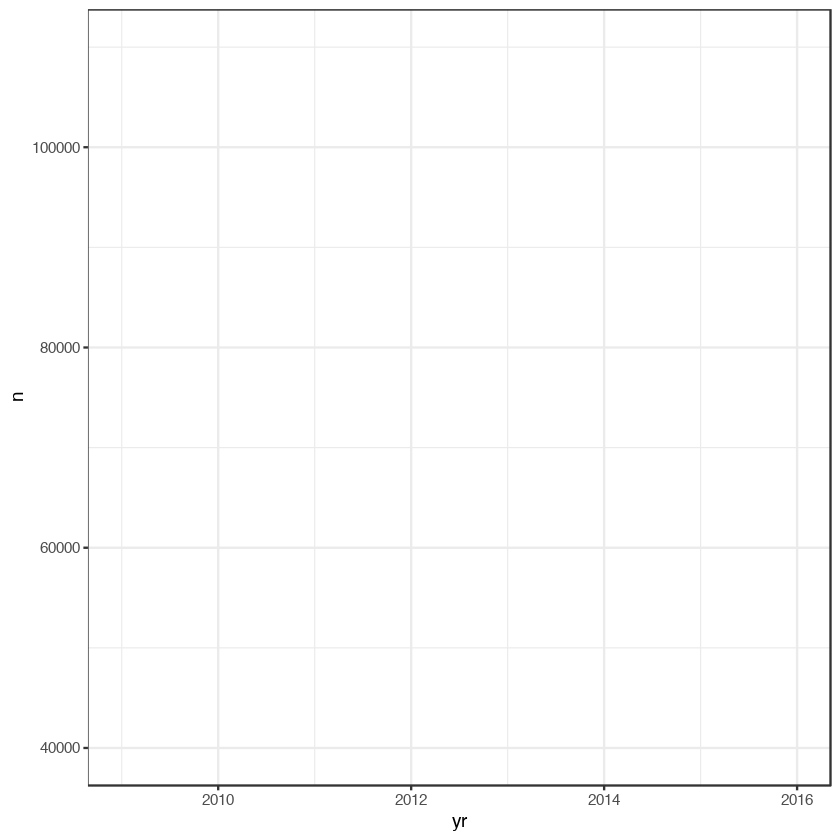

In [3]:
ggplot(stops_by_yr, aes(x = yr, y = n))

## Step 3: putting in lines

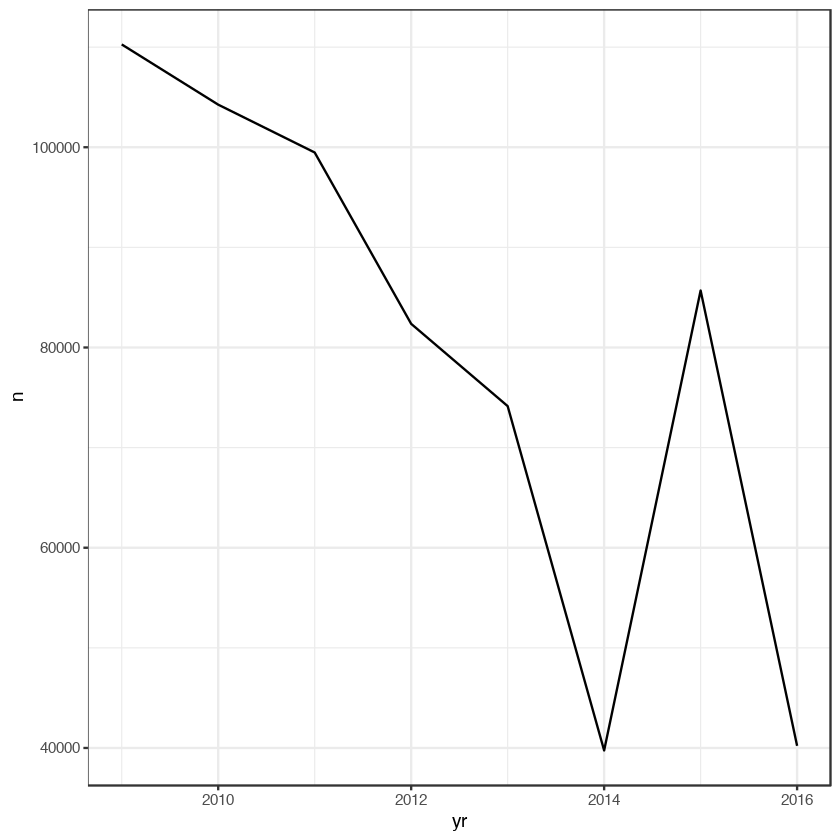

In [4]:
ggplot(stops_by_yr, aes(x = yr, y = n)) +
    geom_line()

## Step 4: Putting in points

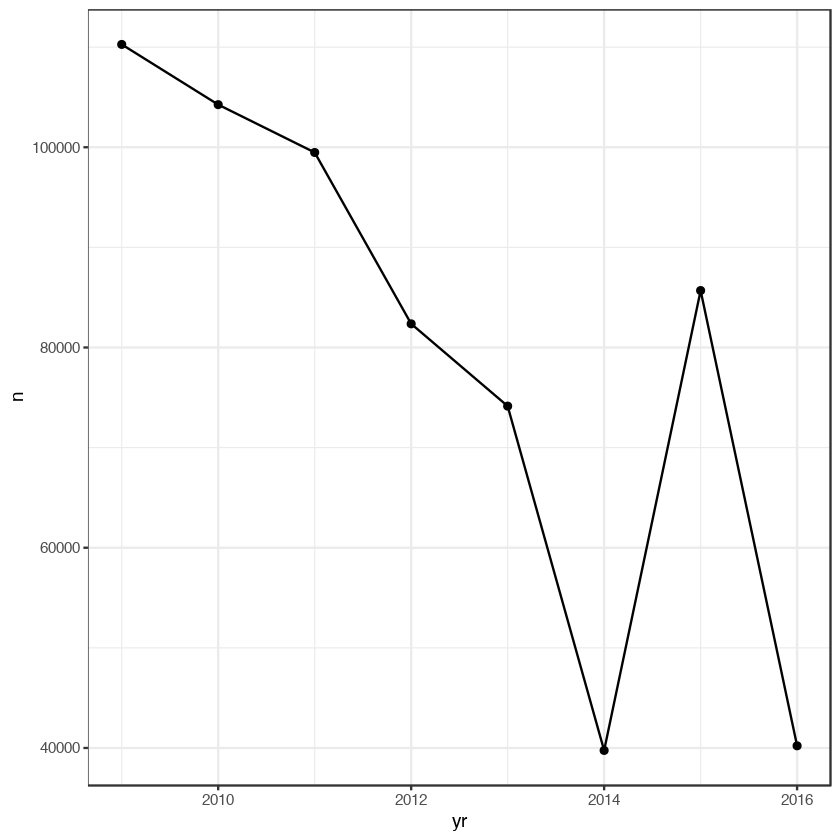

In [5]:
ggplot(stops_by_yr, aes(x = yr, y = n)) +
    geom_line() +
    geom_point()

## Step 5: Adding labels

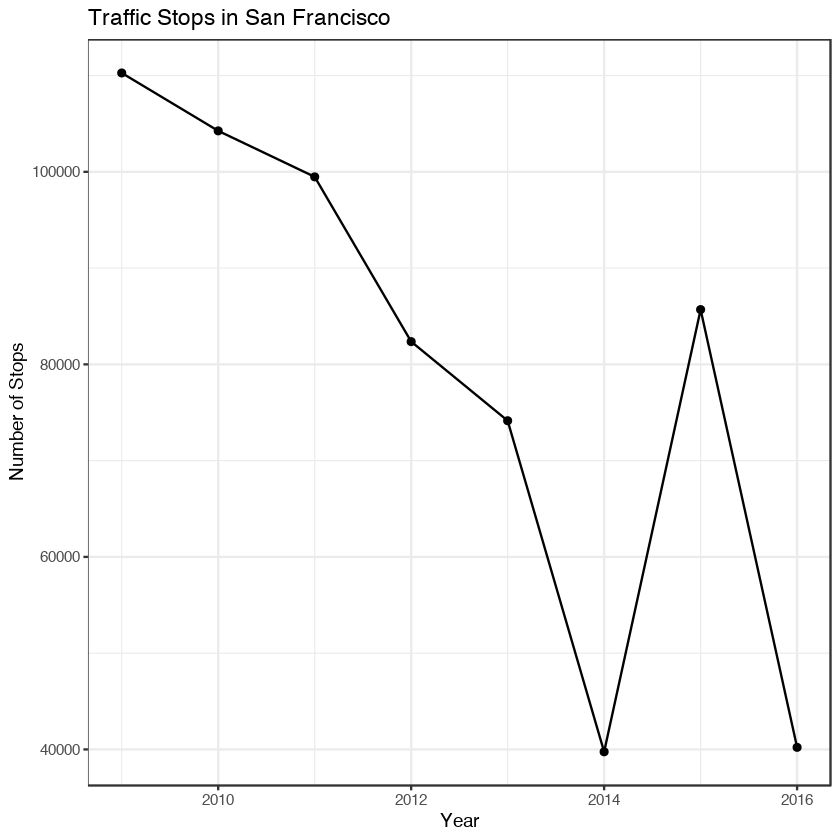

In [6]:
ggplot(stops_by_yr, aes(x = yr, y = n)) +
    geom_line() +
    geom_point() +
    labs(
        x = "Year",
        y = "Number of Stops",
        title = "Traffic Stops in San Francisco"
    )

## Making bar charts

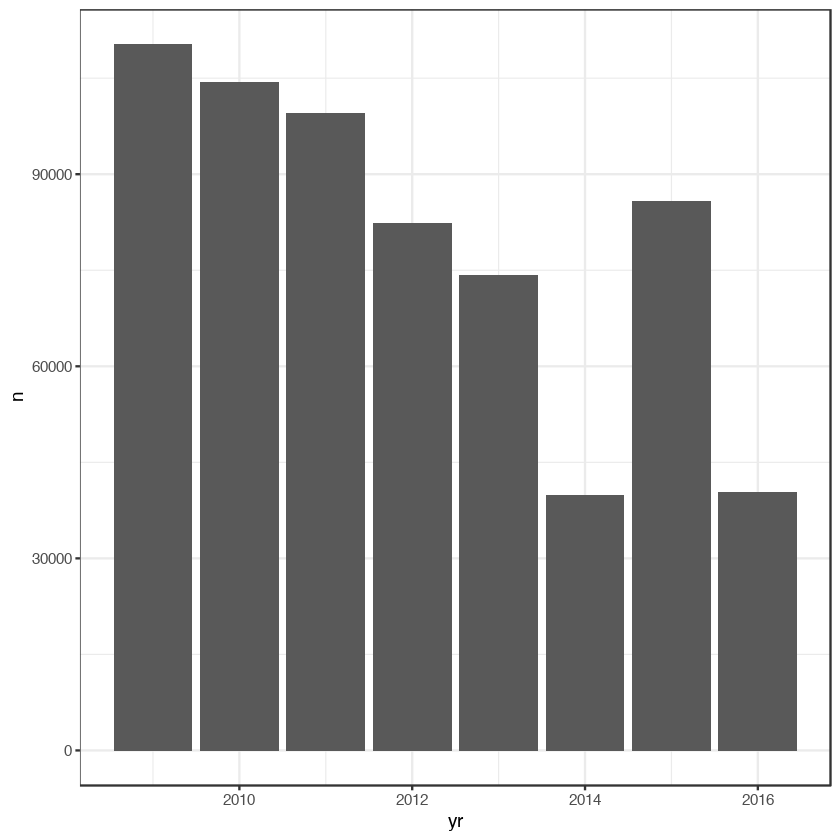

In [13]:
ggplot(stops_by_yr, aes(x = yr, y = n)) +
    geom_col()

## Making histograms

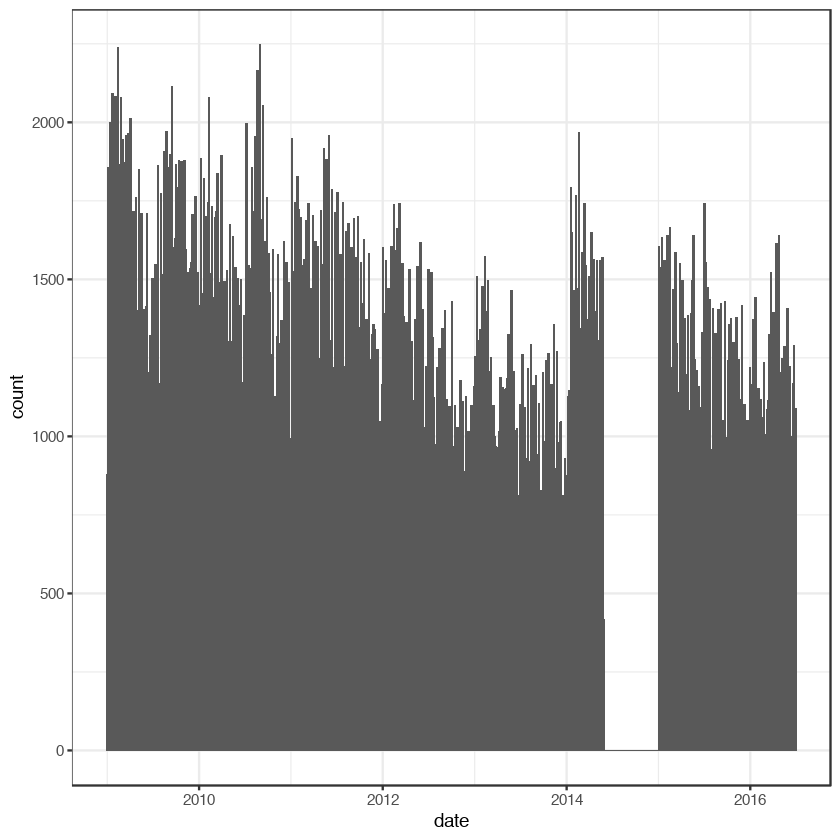

In [8]:
# Try changing the number after "bins"!
ggplot(data = stops, aes(x = date)) +
    geom_histogram(bins = 500)

## Adding color

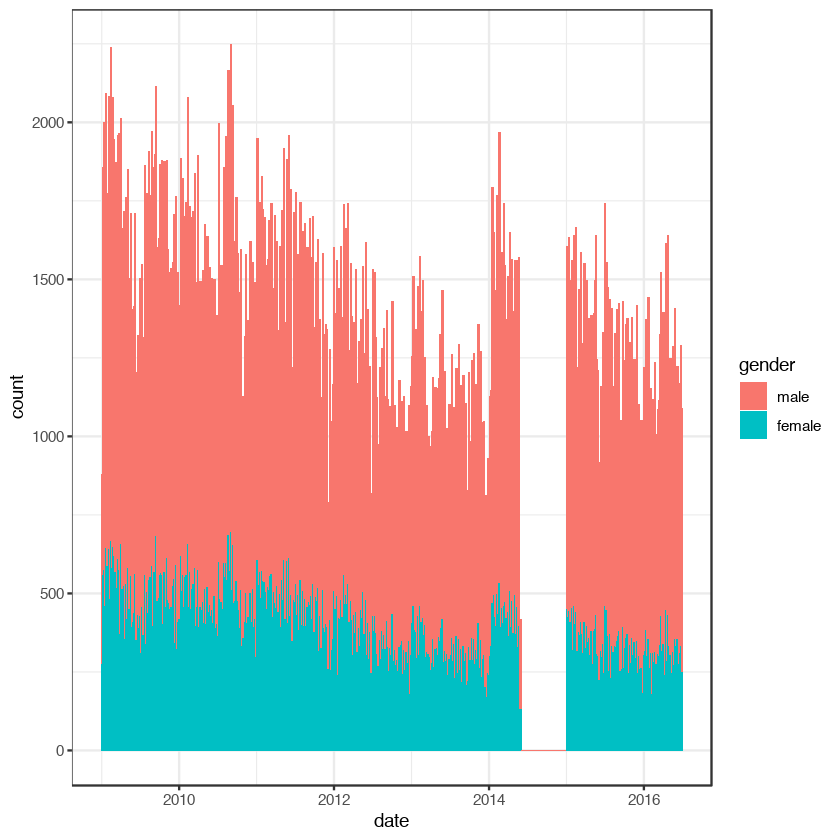

In [9]:
ggplot(data = stops, aes(x = date, fill = gender)) +
    geom_histogram(bins = 500)

ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'gender' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

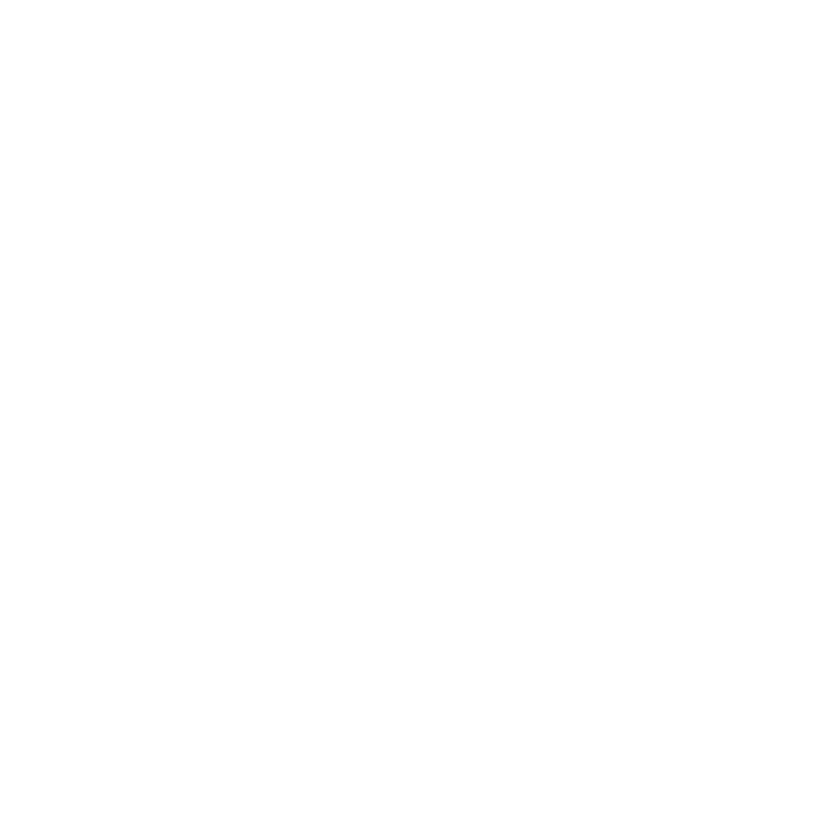

In [10]:
# Why doesn't this work?????
ggplot(data = stops_by_yr, aes(x = yr, y = n, color = gender)) +
    geom_line() +
    geom_point() 

In [11]:
# Oh right... stops_by_yr doesn't have any column called "gender"
stops_by_yr

yr,n
<dbl>,<int>
2009,110269
2010,104254
2011,99476
2012,82362
2013,74144
2014,39752
2015,85689
2016,40215


In [15]:
# Let's make a new table counting by year AND gender

# OUR CODE GOES HERE

stops_by_yr_and_gender <- stops %>% count(yr, gender)

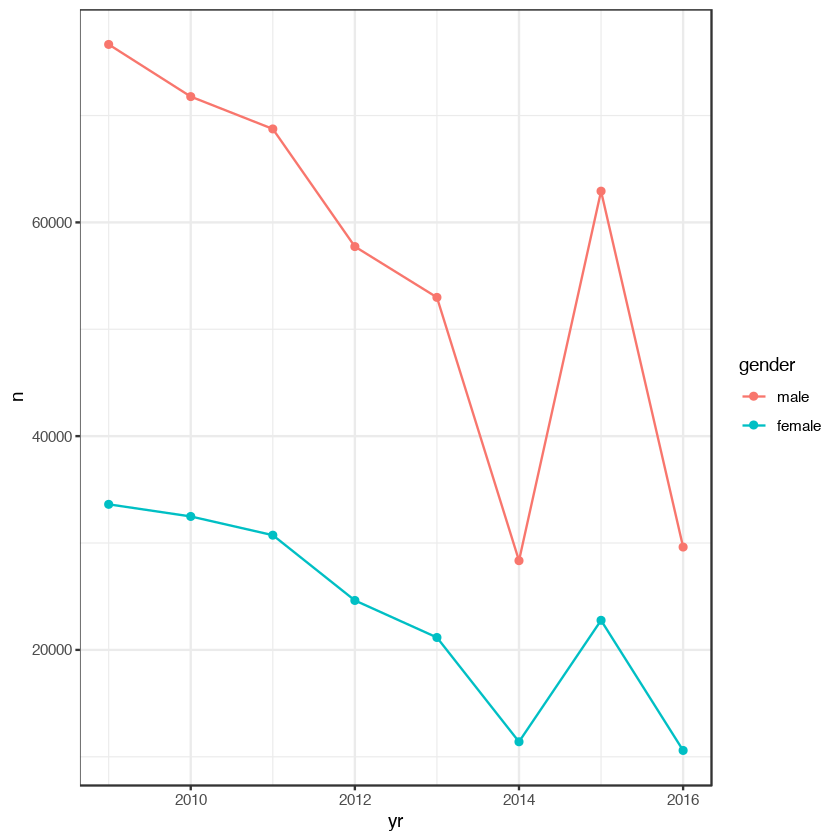

In [16]:
ggplot(data = stops_by_yr_and_gender, aes(x = yr, y = n, color = gender)) +
    geom_line() +
    geom_point() 

## Making interactive plots (woah!)

In [ ]:
# install.packages(plotly)
library(plotly)

In [ ]:
# First just save your plot to a variable
p <- stops %>%
    ggplot(aes(x = date, fill = gender)) +
    geom_histogram(bins = 500)

# Then put that plot variable into the function `ggplotly()`
ggplotly(p)

## How do I learn all of these `geoms` and such??

There's a really great [helper's guide](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf) to ggplot2. Check it out!